In [1]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.0 MB/s eta 0:00:00


In [2]:
!pip install pandas

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

df = pd.read_csv("ElonGoogleNews.csv")
#print(df.head())
analyzer = SentimentIntensityAnalyzer()

#making buckets for each
negative = []
neutral = []
positive = []

for n in range(df.shape[0]):
  title = df.iloc[n,0]
  desc = df.iloc[n,2]
  title_analyzed = analyzer.polarity_scores(title)
  desc_analyzed = analyzer.polarity_scores(desc)

  negative.append(((title_analyzed['neg'])+(desc_analyzed['neg']))/2)
  neutral.append(((title_analyzed['neu'])+(desc_analyzed['neu']))/2)
  positive.append(((title_analyzed['pos'])+(desc_analyzed['pos']))/2)

df["Negative"] = negative
df["Neutral"] = neutral
df["Positive"] = positive

#displaying scores of each article in front of it
pd.set_option('display.max_columns',None)
#print(df.head())

#more analyis - finding top 5 negative articles
#print(df.nlargest(5,['Negative']))

#getting idea of the overall sentiment
print(df["Negative"].mean())
print(df["Neutral"].mean())
print(df["Positive"].mean())

0.06298629893238433
0.8512400355871886
0.085773487544484


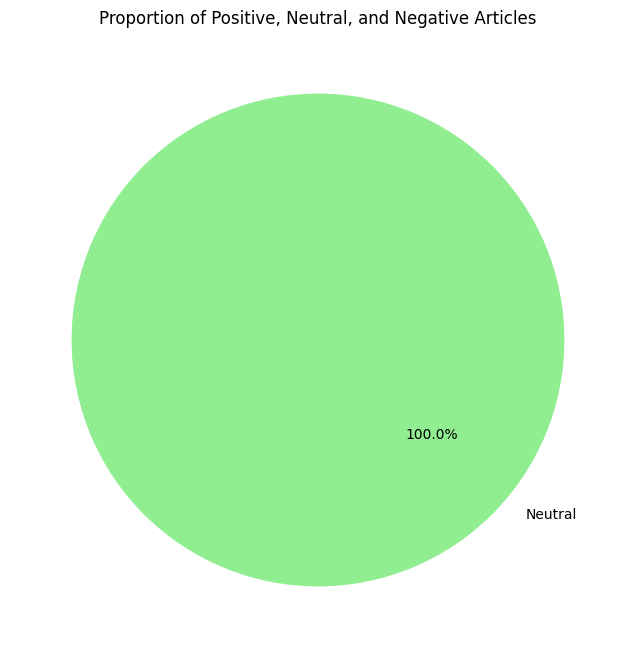

In [11]:
#plotting a pie-chart to find the proportion of positive, neutral, and negative articles
import matplotlib.pyplot as plt

def categorize_sentiment(row):
    if row['Positive'] > row['Negative'] and row['Positive'] > row['Neutral']:
        return 'Positive'
    elif row['Neutral'] > row['Positive'] and row['Neutral'] > row['Negative']:
        return 'Neutral'
    else:
        return 'Negative'

# Create a new column for overall sentiment category
df['Sentiment_Category'] = df.apply(categorize_sentiment, axis=1)

# Count the number of articles in each sentiment category
sentiment_counts = df['Sentiment_Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightgray', 'lightcoral'], startangle=140)
plt.title('Proportion of Positive, Neutral, and Negative Articles')
plt.show()